In [1]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [11]:
reeses=cv2.imread('reeses_puffs.png',0)

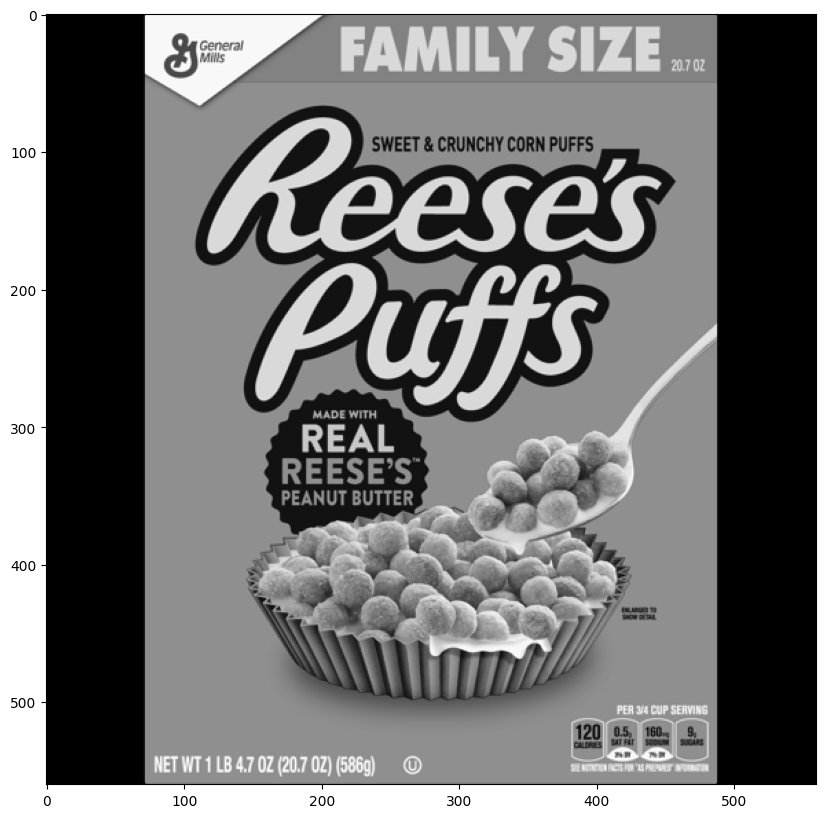

In [12]:
display(reeses)

In [18]:
cereals=cv2.imread('many_cereals.jpg',0)

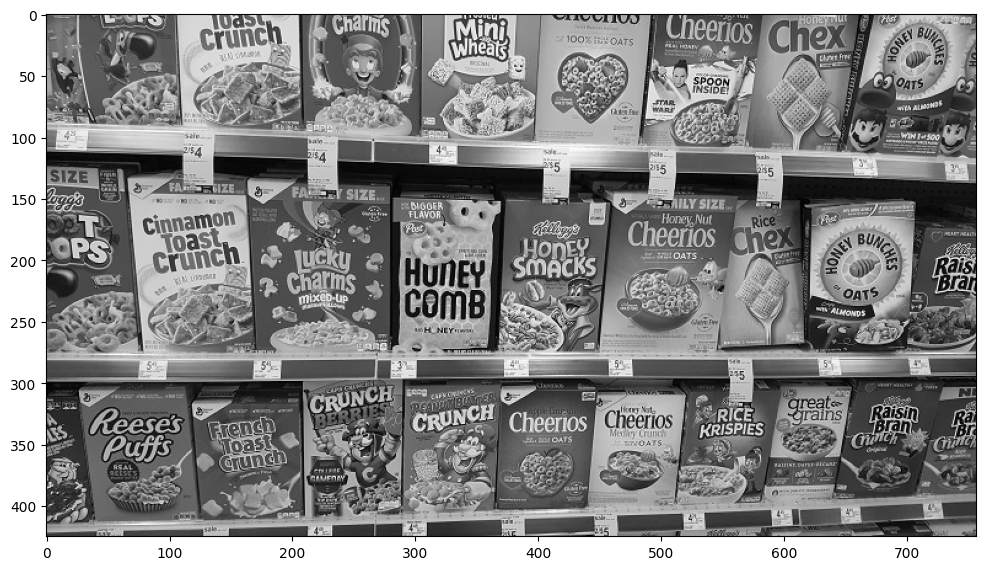

In [19]:
display(cereals)

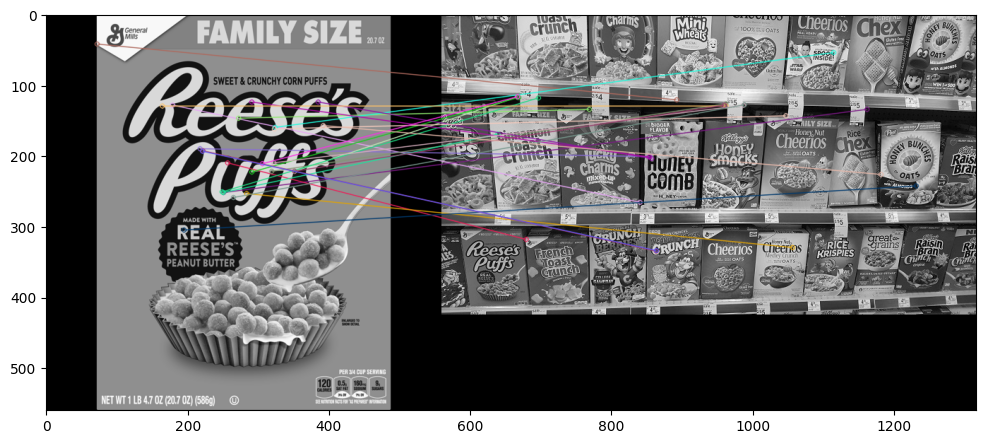

In [20]:
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

In [24]:
sift=cv2.xfeature2d.SIFT_create()
kp1,des1=sift.detectAndComputer(reeses,None)
kp1,des2=sift.detectAndComputer(cereals,None)
#FLANN parameters
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)
flann=cv2.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(des1,des2,k=2)
matchersMask=[[0,0] for i in range(len(matches))]
for i,(match1,match2) in enumerate(matches):
    if match1.distance<0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params=dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)
flann_matchers=cv2.drawMatchersKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

AttributeError: module 'cv2' has no attribute 'xfeature2d'